In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

c:\deeplearning\python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = "D:\jupyter\Keras_tutorial\ch02_CNN_with_Keras\\data\\train"
valid_path = "D:\jupyter\Keras_tutorial\ch02_CNN_with_Keras\\data\\valid"
test_path = "D:\jupyter\Keras_tutorial\ch02_CNN_with_Keras\\data\\test"

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(
    train_path, target_size=(224, 224), classes=['dogs', 'cats'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(
    valid_path, target_size=(224, 224), classes=['dogs', 'cats'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(
    test_path, target_size=(224, 224), classes=['dogs', 'cats'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
#Plot image with labels within jupyter notebook
def plots(ims, figsize=(12, 6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0, 2, 3, 1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//row + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else "none")

In [5]:
imgs, labels = next(train_batches)

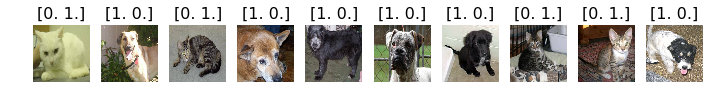

In [6]:
plots(imgs, titles=labels)

In [7]:
#from IPython.display import Image, display
#Image("D:\jupyter\Keras_tutorial\ch02_CNN_with_Keras\data\\test\cats\\45.jpg")

**Build and train CNN 

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    Flatten(),
    Dense(2 , activation='softmax'),
])

In [9]:
model.compile(Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit_generator(train_batches, steps_per_epoch=4,
                    validation_data=valid_batches,
                    validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 3s - loss: 6.3418 - acc: 0.6000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


**Predict

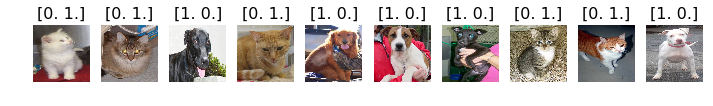

In [11]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [12]:
test_labels = test_labels[:, 0]
test_labels

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1.], dtype=float32)

In [13]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [14]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [15]:
cm = confusion_matrix(test_labels, predictions[:, 0])

In [16]:
def plot_confusion_matrix(cm, classes, normalize=False, title="confusion_matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color='white' if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True_label')
    plt.xlabel('predicted label')
                

In [17]:
cm_plot_labels = ['cats', 'dogs']

Confusion matrix, without normalization
[[0 5]
 [0 5]]


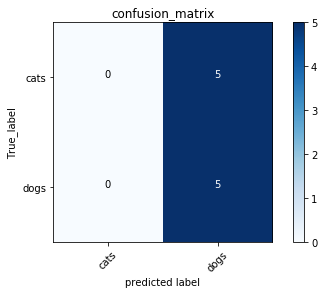

In [18]:
plot_confusion_matrix(cm, cm_plot_labels, title='confusion_matrix')

**Bulid Fine-tuned VGG16 model

In [19]:
vgg16_model = keras.applications.vgg16.VGG16()

In [20]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [21]:
type(vgg16_model)

keras.engine.training.Model

In [22]:
model_fine = Sequential()

In [23]:
for layer in vgg16_model.layers[:-1]:
    model_fine.add(layer)

In [24]:
model_fine.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [25]:
for layer in model_fine.layers:
    layer.trainable = False

In [26]:
model_fine.add(Dense(2, activation='softmax'))

In [27]:
model_fine.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [28]:
model_fine.compile(Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model_fine.fit_generator(train_batches, steps_per_epoch=4,
                   validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 3s - loss: 1.9013 - acc: 0.5000 - val_loss: 0.3396 - val_acc: 0.8125
Epoch 2/5
 - 1s - loss: 0.2499 - acc: 0.9000 - val_loss: 0.0136 - val_acc: 1.0000
Epoch 3/5
 - 1s - loss: 0.0403 - acc: 0.9750 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 4/5
 - 1s - loss: 0.0226 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 5/5
 - 1s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000


**Predict using fine-tuned VGG16 model

In [30]:
test_imgs_fine, test_labels_fine = next(test_batches)

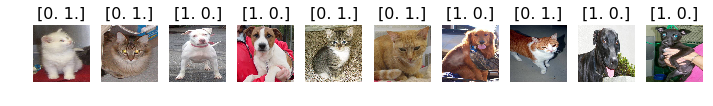

In [32]:
plots(test_imgs_fine, titles=test_labels_fine)

In [33]:
test_labels_fine = test_labels_fine[:, 0]
test_labels_fine

array([0., 0., 1., 1., 0., 0., 1., 0., 1., 1.], dtype=float32)

In [34]:
predictions_fine = model_fine.predict_generator(test_batches, steps=1, verbose=0)

In [35]:
cm_fine = confusion_matrix(test_labels_fine, np.round(predictions_fine[:, 0]))

In [36]:
cm_plot_labels_fine= ['cats', 'dogs']

Confusion matrix, without normalization
[[5 0]
 [0 5]]


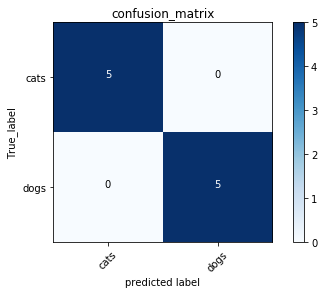

In [37]:
plot_confusion_matrix(cm_fine, cm_plot_labels_fine, title='confusion_matrix')